# IPython Notebook for turning in solutions to the problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 9

## Problem 1  

We must read in the data from the datafile, Chapter\_9/zijd\_example.dat, convert the vectors to x,y,z and plot them as a Zijderveld diagram.  
First let's read in the data as pandas DataFrame.

In [1]:
import pandas as pd
# read in the data into a pandas frame with the first line as a header
data = pd.read_csv('Chapter_9/zijd_example.csv',header=0)
print data.head

<bound method DataFrame.head of   Specimen  Treat       Int    Dec   Inc
0    ex9-1     20  0.004199  186.1  -2.3
1    ex9-1    150  0.004834  188.6 -14.8
2    ex9-1    250  0.005453  189.8 -23.4
3    ex9-1    350  0.005978  191.1 -27.1
4    ex9-1    450  0.006400  192.1 -30.8
5    ex9-1    500  0.006525  193.4 -32.5
6    ex9-1    525  0.005950  193.9 -34.5
7    ex9-1    550  0.002927  193.7 -34.1
8    ex9-1    575  0.000383  200.1 -22.0>


Re-use our old code dir2cart from Chapter 2.  

In [2]:
import numpy as np
deg2rad=np.pi/180. # converts from degrees to radians
def dir2cart(data):
    decs,incs,ints=data[0]*deg2rad,data[1]*deg2rad,data[2]
    X=ints*np.cos(decs)*np.cos(incs)
    Y=ints*np.sin(decs)*np.cos(incs)
    Z=ints*np.sin(incs)
    cart=np.array([X,Y,Z]).transpose()
    return cart

Now we plot X (N) versus -Y (W) as solid red symbols and X versus -Z (Up) as open squares.

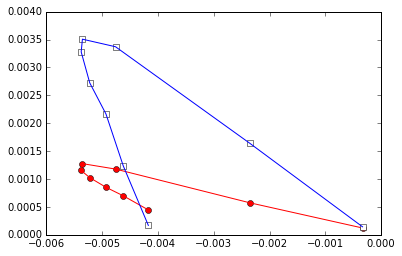

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# send the vectors to dir2cart
cart = dir2cart([data['Dec'],data['Inc'],data['Int']]).transpose()
# plot the cartesian coordinates
plt.plot(cart[0],-cart[1],'ro',cart[0],-cart[1],'r-')
plt.plot(cart[0],-cart[2],'ws',cart[0],-cart[2],'b-')

## Problem 1b

First let's find out about zeq.py..... 

In [5]:
!zeq.py -h


    NAME
       zeq.py
  
    DESCRIPTION
       plots demagnetization data. The equal area projection has the X direction (usually North in geographic coordinates)
          to the top.  The red line is the X axis of the Zijderveld diagram.  Solid symbols are lower hemisphere. 
          The solid (open) symbols in the Zijderveld diagram are X,Y (X,Z) pairs.  The demagnetization diagram plots the
          fractional remanence remaining after each step. The green line is the fraction of the total remaence removed 
          between each step.        

    INPUT FORMAT
       takes specimen_name treatment intensity declination inclination  in space
 delimited file

    SYNTAX
        zeq.py [command line options

    OPTIONS
        -f FILE for reading from command line
        -u [mT,C] specify units of mT OR C, default is unscaled
        -sav save figure and quit
        -fmt [svg,jpg,png,pdf] set figure format [default is svg]
        -beg [step number] treatment step for beginnin

Ahhhh..  so I just set the -f, -u, -sav and -fmt flags: 


In [5]:
!zeq.py -f Chapter_9/zijd_example.dat -u C -sav -fmt png

0     20.0 4.199e-06   186.1    -2.3 
1    150.0 4.834e-06   188.6   -14.8 
2    250.0 5.453e-06   189.8   -23.4 
3    350.0 5.978e-06   191.1   -27.1 
4    450.0 6.400e-06   192.1   -30.8 
5    500.0 6.525e-06   193.4   -32.5 
6    525.0 5.950e-06   193.9   -34.5 
7    550.0 2.927e-06   193.7   -34.1 
8    575.0 3.830e-07   200.1   -22.0 
 
3  saved in  ex9-1_demag.png
1  saved in  ex9-1_eqarea.png
2  saved in  ex9-1_zijd.png


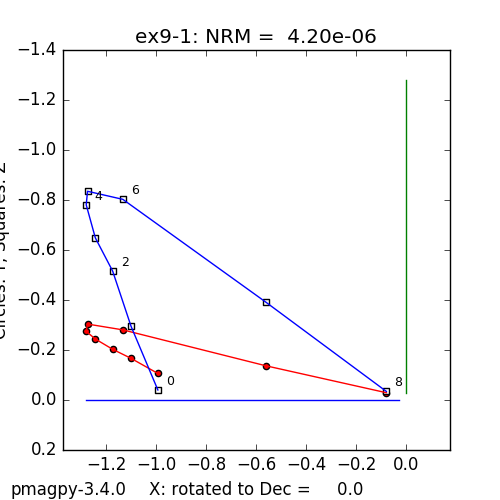

In [6]:
from IPython.display import Image
Image(filename='ex9-1_zijd.png')

Now I want to fit a line through points 4 to 8 and then again a plane through all the points.  First the line: 

In [9]:
!zeq.py -f Chapter_9/zijd_example.dat -u C -sav -fmt png -beg 4 -end 8 -ct l

0     20.0 4.199e-06   186.1    -2.3 
1    150.0 4.834e-06   188.6   -14.8 
2    250.0 5.453e-06   189.8   -23.4 
3    350.0 5.978e-06   191.1   -27.1 
4    450.0 6.400e-06   192.1   -30.8 
5    500.0 6.525e-06   193.4   -32.5 
6    525.0 5.950e-06   193.9   -34.5 
7    550.0 2.927e-06   193.7   -34.1 
8    575.0 3.830e-07   200.1   -22.0 
4 8
Specimen, calc_type, N, min, max, MAD, dec, inc
ex9-1 DE-BFL 5  450.00 575.00    3.4   192.5   -32.7
3  saved in  ex9-1_demag.png
1  saved in  ex9-1_eqarea.png
2  saved in  ex9-1_zijd.png


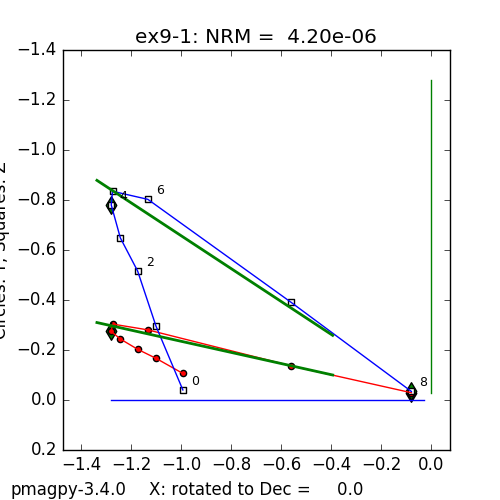

In [10]:
Image(filename='ex9-1_zijd.png')

## Problem 1c

The approximate direction of the low stability component is (assuming for the moment that these are geographic coordinates), we have a northeast and down low stability component and an a southeast and up high stability component.   The magnetization is pretty much "dead" by 575$^{\circ}$C, quite close to the Curie Temperature of magnetite, so we guess "magnetite" as a remanence carrier.  


## Problem 1d

And now the plane through all the points - and I want to look at the equal area projection instead of the Zijderveld plot. 

In [21]:
!zeq.py -f Chapter_9/zijd_example.dat -u C -sav -fmt png -beg 1 -end 7 -ct p

0     20.0 4.199e-06   186.1    -2.3 
1    150.0 4.834e-06   188.6   -14.8 
2    250.0 5.453e-06   189.8   -23.4 
3    350.0 5.978e-06   191.1   -27.1 
4    450.0 6.400e-06   192.1   -30.8 
5    500.0 6.525e-06   193.4   -32.5 
6    525.0 5.950e-06   193.9   -34.5 
7    550.0 2.927e-06   193.7   -34.1 
8    575.0 3.830e-07   200.1   -22.0 
1 7
Specimen, calc_type, N, min, max, MAD, dec, inc
ex9-1 DE-BFP 7  150.00 550.00    2.7   274.8    12.7
3  saved in  ex9-1_demag.png
1  saved in  ex9-1_eqarea.png
2  saved in  ex9-1_zijd.png


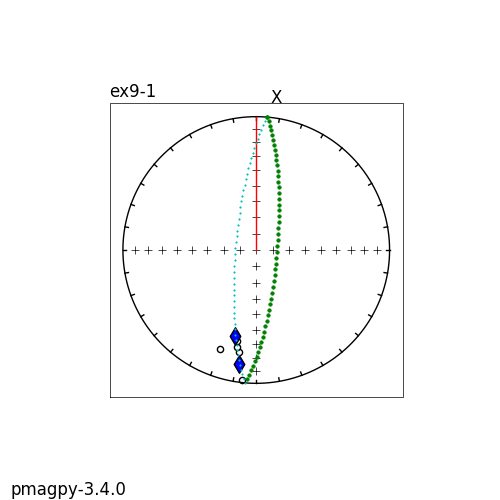

In [22]:
Image(filename='ex9-1_eqarea.png')

The great circle interpretation makes the most sense, because the second component really only has three demagnetization steps and is not very well defined.  To acquire a VRM with a laboratory blocking temperature of 500$^{\circ}$ held by magnetite over a million year interval, the rock must have been held at $\sim400^{\circ}$, using Figure 7.22.  

## Problem 2a

For this program, we can use the command line program, sundec.py, with the interactive switch, -i.  Typing sundec.py -i on the command line and answering the questions looks like this (_italicized text is the computer query_):

$ sundec.py -i

_Time difference between Greenwich Mean Time (hrs to add to GMT for local time):_ 3

_Year: <cntl-D to quit>_ 1994

_Month:_ 5

_Day:_  23

_hour:_  16

_minute:_  09

_Latitude of sampling site (negative in southern hemisphere):_ 35

_Longitude of sampling site (negative for western hemisphere):_ 33

_Shadow angle:_68

  154.2

So the answer is 154.2.   


## Problem 2b


But sundec.py calls the function pmag.dosundec which we could call directly from the notebook after importing the module pmag.py.

In [23]:
import pmagpy.pmag as pmag
print pmag.dosundec.__doc__


    returns the declination for a given set of suncompass data
    INPUT:
      sundata={'date':'yyyy:mm:dd:hr:min','delta_u':DU,'lat':LAT,'lon':LON,'shadow_angle':SHADAZ}
      where:
         DU is the hours to subtract from local time to get Greenwich Mean Time
         LAT,LON are the site latitude,longitude (negative for south and west respectively)
         SHADAZ is the shadow angle of the desired direction with respect to the sun.
    OUTPUT:
      the declination of the desired direction wrt true north.
    


So we just fill in the sundata dictionary with the desired numbers and call pmag.dosundec.

In [24]:
sundata={'date':'1994:05:23:16:09','delta_u':3,'lat':35,'lon':33,'shadow_angle':68}
print '%7.1f'%(pmag.dosundec(sundata))

  154.2


## Problem 3a

This problem is challenging. First do the problem "by hand".  You can check your answer with the PmagPy program di_tilt.py on the command line:

$ di_tilt.py -i

_Declination: <cntl-D> to quit_ 336

_Inclination:_ -2

_Dip direction:_ 351

_Dip: 41_

  330.9   -41.3
  

## Problem 3b

Let's try this one by called the function pmag.dotilt(dec,inc,bed_az,bed_dip).  

In [29]:
print '%7.1f %7.1f'%(pmag.dotilt(336,-2,351,41))

  330.9   -41.3


## Problem 4

(from Robert Butler):  To unplunge the fold, we must rotate the fold axis to horizontal. This is
done by rotating about a horizontal axis which is 90° from the trend of the
fold axis; at azimuth 260° in this case. The NRM direction and the pole to
bedding are rotated by 20° about this axis as shown below. The resulting
NRM direction corrected for plunge is: I=47°; D=297°. The pole to bedding
corrected for plunge is: I=68°; D=260°.   

Using our pmag.dotilt function, it looks like this:

In [30]:
dec,inc=309,33  # declination and inclination of direction
bed_az,bed_dip=120,29 # bedding dip direction and dip
bed_pole_az=bed_az+180 # azimuth of  bedding pole 
bed_pole_dip=90.-bed_dip # azimuth of bedding dip
trend,plunge=170,20
# first correct the bed_pole_az, bed_pole_dip, dec, inc for the trend and plunge:
bed_pole_az_corr,bed_pole_dip_corr=pmag.dotilt(bed_pole_az,bed_pole_dip,trend,plunge)
dec_corr,inc_corr=pmag.dotilt(dec,inc,trend,plunge)
print 'plunge corrected bedding pole azimuth and dip: ,%7.1f %7.1f'%(bed_pole_az_corr,bed_pole_dip_corr)
print 'plunge corrected declination inclination: ,%7.1f %7.1f'%(dec_corr,inc_corr)


plunge corrected bedding pole azimuth and dip: ,  259.0    68.2
plunge corrected declination inclination: ,  296.6    46.7


To complete the structural correction, we must rotate the NRM direction
while restoring the beds to horizontal about the bedding strike (corrected
for plunge). The pole to bedding is I=68°; D=260°. So the dip is 22° and
strike is 170°. Rotating the plunge corrected NRM direction about this
strike line (as shown below) yields NRM direction: I=62°; D=320°.

Using pmag.dotilt, we get:


In [31]:
# first fine the bedding dip direction and dip from the pole to the bed
# (corrected for plunge)
# remember that bedding dip direction is at right angles to the strike
bed_az_corr,bed_dip_corr= bed_pole_az_corr-180.,90.-bed_pole_dip_corr
print '%7.1f %7.1f'%(bed_az_corr,bed_dip_corr) 
# now plug these numbers into pmag.dotilt to get the tilt and plunge corrected values.
print 'plunge and tilt corrected values: %7.1f %7.1f'%(pmag.dotilt(dec_corr,inc_corr,bed_az_corr,bed_dip_corr))

   79.0    21.8
plunge and tilt corrected values:   319.8    61.4


## Problem 5

Here is a function that will do the geographic correction:

In [33]:
def dogeo(dec,inc,az,pl):
    A1,A2,A3=[],[],[] # set up lists for rotation vector
    Dir=[dec,inc,1.] # put dec inc in direction list and set  length to unity
    X=dir2cart(Dir) # get cartesian coordinates
#
#   set up rotation matrix
#
    A1=dir2cart([az,pl,1.])
    A2=dir2cart([az+90.,0,1.])
    A3=dir2cart([az-180.,90.-pl,1.])
#
# do rotation
#
    xp=A1[0]*X[0]+A2[0]*X[1]+A3[0]*X[2]
    yp=A1[1]*X[0]+A2[1]*X[1]+A3[1]*X[2]
    zp=A1[2]*X[0]+A2[2]*X[1]+A3[2]*X[2]
#
# transform back to dec,inc
#
    Dir_geo=pmag.cart2dir([xp,yp,zp])
    return Dir_geo[0],Dir_geo[1] # return the corrected dec and inc


which we can call here:

In [34]:
dec,inc,az,pl = 8.1,45.2, 347 ,27
dec_geo,inc_geo=dogeo(dec,inc,az,pl)
print '%7.1f %7.1f'%(dec_geo,inc_geo)

    5.3    71.6


And here is one for doing tilt corrections: 

In [35]:
def dotilt(dec,inc,bed_az,bed_dip):
    # this calls functions from the pmag module that we have already written in previous 
    # homework problems.   you can use these, or use your own! 
    X=pmag.dir2cart([dec,inc,1.]) # get cartesian coordinates of dec,inc
# get some sines and cosines of new coordinate system
    sa,ca= -np.sin(bed_az*deg2rad),np.cos(bed_az*deg2rad)
    cdp,sdp= np.cos(bed_dip*deg2rad),np.sin(bed_dip*deg2rad)
# do the rotation
    xc=X[0]*(sa*sa+ca*ca*cdp)+X[1]*(ca*sa*(1.-cdp))+X[2]*sdp*ca
    yc=X[0]*ca*sa*(1.-cdp)+X[1]*(ca*ca+sa*sa*cdp)-X[2]*sa*sdp
    zc=X[0]*ca*sdp-X[1]*sdp*sa-X[2]*cdp
# convert back to direction:
    Dir=pmag.cart2dir([xc,yc,-zc])
    return Dir[0],Dir[1] # return declination, inclination of rotated direction


Let's take the geographically corrected dec and inc from before and plug it in:

In [36]:
bed_az,bed_dip=225.,21. # add 90 to strike to get bedding dip direction. 
dec_tilt,inc_tilt=dotilt(dec_geo,inc_geo,bed_az,bed_dip)
print '%7.1f %7.1f'%(dec_tilt,inc_tilt)

  285.6    76.6


## Problem 6

Just follow the instructions in the book.  